## Análise da base de dados Titanic usando RandomForestClassifier

* PassengerId: Id do passageiro;
* Survived: Composto por 0 e 1, informa se o passageiro sobreviveu ao desastre. O valor 0 é indicado para aqueles que não sobreviveram e o valor 1 para aqueles que sobreviveram;
* Pclass: Classe na qual o passageiro estava, temos três valores de classe, 1, 2 e 3;
* Name: Nome do passageiro;
* Sex: Sexo do passageiro;
* Age: Idade do passageiro;
* Sibsp: Número de irmãos / cônjuges a bordo;
* Parch: Número de pais / filhos a bordo;
* Ticket: Número da passagem;
* Fare: Preço pago na passagem;
* Cabin: Número da cabine;
* Embarked: Informa de qual porto o passageiro embarcou. “S” significa Southampton, “C” é referente a Cherbourg e “Q” para Queenstown.

In [186]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [187]:
train = pd.read_csv('train.csv')

In [188]:
test = pd.read_csv('test.csv')

In [189]:
submission = pd.read_csv('gender_submission.csv')

In [190]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [191]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualizando a distribuição dos dados

In [192]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Verificando a correlação entre os dados

In [193]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


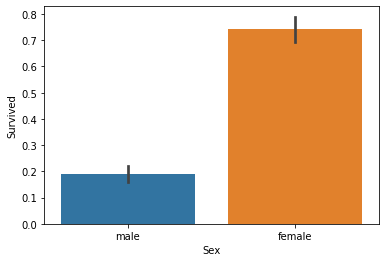

In [194]:
sns.barplot(train['Sex'], train['Survived'], data=train)

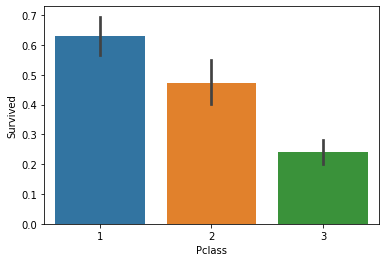

In [195]:
sns.barplot(train['Pclass'], train['Survived'], data=train)

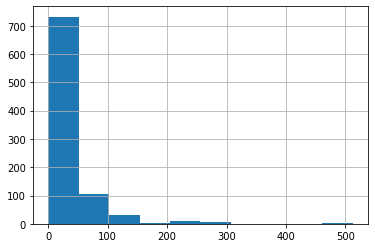

In [196]:
train['Fare'].hist()

In [197]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [198]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [199]:
train['Age'].isnull().sum()

0

In [200]:
def sex_number(sex):
    if(sex == 'male'):
        return 1
    else:
        return 0

In [201]:
train['Sex_number'] = train['Sex'].map(sex_number)

In [202]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [203]:
train.drop('Sex', axis=1, inplace=True)

In [204]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_number
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [205]:
x_train = train[['SibSp','Fare','Age','Sex_number']]

In [206]:
x_train

,SibSp,Fare,Age,Sex_number
0,1,7.2500,22.000000,1
1,1,71.2833,38.000000,0
2,0,7.9250,26.000000,0
3,1,53.1000,35.000000,0
4,0,8.0500,35.000000,1
...,...,...,...,...
886,0,13.0000,27.000000,1
887,0,30.0000,19.000000,0
888,1,23.4500,29.699118,0
889,0,30.0000,26.000000,1


In [207]:
y_train = train.Survived

In [208]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [209]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [210]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [211]:
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [212]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [213]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [214]:
test['Sex_number'] = test['Sex'].map(sex_number)

In [215]:
x_test = test[['SibSp','Fare','Age','Sex_number']]

In [216]:
x_test.head()

,SibSp,Fare,Age,Sex_number
0,0,7.8292,34.5,1
1,1,7.0000,47.0,0
2,0,9.6875,62.0,1
3,0,8.6625,27.0,1
4,1,12.2875,22.0,0


In [217]:
x_train.isnull().sum()

SibSp         0
Fare          0
Age           0
Sex_number    0
dtype: int64

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [219]:
rfc = RandomForestClassifier(n_estimators=500,max_depth=1, random_state=242)

### Cross Validation

In [220]:
score = cross_val_score(rfc, x_test,submission.Survived, cv=10)

In [221]:
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [222]:
score.mean()

1.0

### Pipeline

In [223]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [224]:
pip_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier(n_estimators=500,max_depth=1, random_state=242))
])

In [225]:
pip_1.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=1,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=242,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [226]:
pip_1.predict(x_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [227]:
score = pip_1.score(x_test, submission.Survived)

In [228]:
score

1.0

### Treinando o modelo

In [229]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=242,
                       verbose=0, warm_start=False)

In [230]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [231]:
x_train.head()

,SibSp,Fare,Age,Sex_number
0,1,7.2500,22.0,1
1,1,71.2833,38.0,0
2,0,7.9250,26.0,0
3,1,53.1000,35.0,0
4,0,8.0500,35.0,1


In [232]:
x_test.head()

,SibSp,Fare,Age,Sex_number
0,0,7.8292,34.5,1
1,1,7.0000,47.0,0
2,0,9.6875,62.0,1
3,0,8.6625,27.0,1
4,1,12.2875,22.0,0


### Predizendo as classes a partir do modelo treinado

In [233]:
predict = rfc.predict(x_test)

In [234]:
predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [235]:
#Medindo a acuracia
accuracy_score(predict, submission.Survived)

1.0

In [236]:
from sklearn import metrics
print(metrics.classification_report(submission.Survived, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



### Matriz de confusão

In [237]:
pd.crosstab(submission.Survived, predict, rownames=['real'], colnames=['predicted'],margins=True)

predicted,0,1,All
real,,,
0,266,0,266
1,0,152,152
All,266,152,418
